In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mlt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif


In [7]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
# Чистка df, убираем NAN, по итогу из 583 записей - остается 579 записей
print(df.isnull().values.any())
print(f'df shape with NaN: {df.shape}')
df = df.dropna()
print(f'df shape without NaN: {df.shape}')

True
df shape with NaN: (583, 11)
df shape without NaN: (579, 11)


In [9]:
print(df['Dataset'].value_counts())

1    414
2    165
Name: Dataset, dtype: int64


In [10]:
df['Gender'] = df['Gender'].map({'Male': 2, 'Female': 1})
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})
print(df['Dataset'].value_counts())

1    414
0    165
Name: Dataset, dtype: int64


In [6]:
df = pd.merge(df[df['Dataset'] == 2], df[df['Dataset'] == 1].sample(n=165), how='outer')
print(df['Dataset'].value_counts())

1    165
2    165
Name: Dataset, dtype: int64


In [7]:
# Корреляция помогает определить взаимосвязь между двумя величинами
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.086161,0.097275,0.050281,-0.045600,0.034828,-0.193750,-0.249239,-0.178570,-0.150297
Total_Bilirubin,0.086161,1.000000,0.963928,0.397677,0.288004,0.270412,-0.014006,-0.266323,-0.304114,-0.328672
Direct_Bilirubin,0.097275,0.963928,1.000000,0.383930,0.263567,0.248506,-0.001073,-0.252894,-0.297947,-0.342549
Alkaline_Phosphotase,0.050281,0.397677,0.383930,1.000000,0.281644,0.333266,-0.086855,-0.212626,-0.275961,-0.208130
Alamine_Aminotransferase,-0.045600,0.288004,0.263567,0.281644,1.000000,0.733230,0.011960,-0.021745,-0.037253,-0.214995
Aspartate_Aminotransferase,0.034828,0.270412,0.248506,0.333266,0.733230,1.000000,0.009130,-0.086838,-0.098230,-0.166204
Total_Protiens,-0.193750,-0.014006,-0.001073,-0.086855,0.011960,0.009130,1.000000,0.803812,0.264797,0.071336
Albumin,-0.249239,-0.266323,-0.252894,-0.212626,-0.021745,-0.086838,0.803812,1.000000,0.709573,0.216799
Albumin_and_Globulin_Ratio,-0.178570,-0.304114,-0.297947,-0.275961,-0.037253,-0.098230,0.264797,0.709573,1.000000,0.223115
Dataset,-0.150297,-0.328672,-0.342549,-0.208130,-0.214995,-0.166204,0.071336,0.216799,0.223115,1.000000


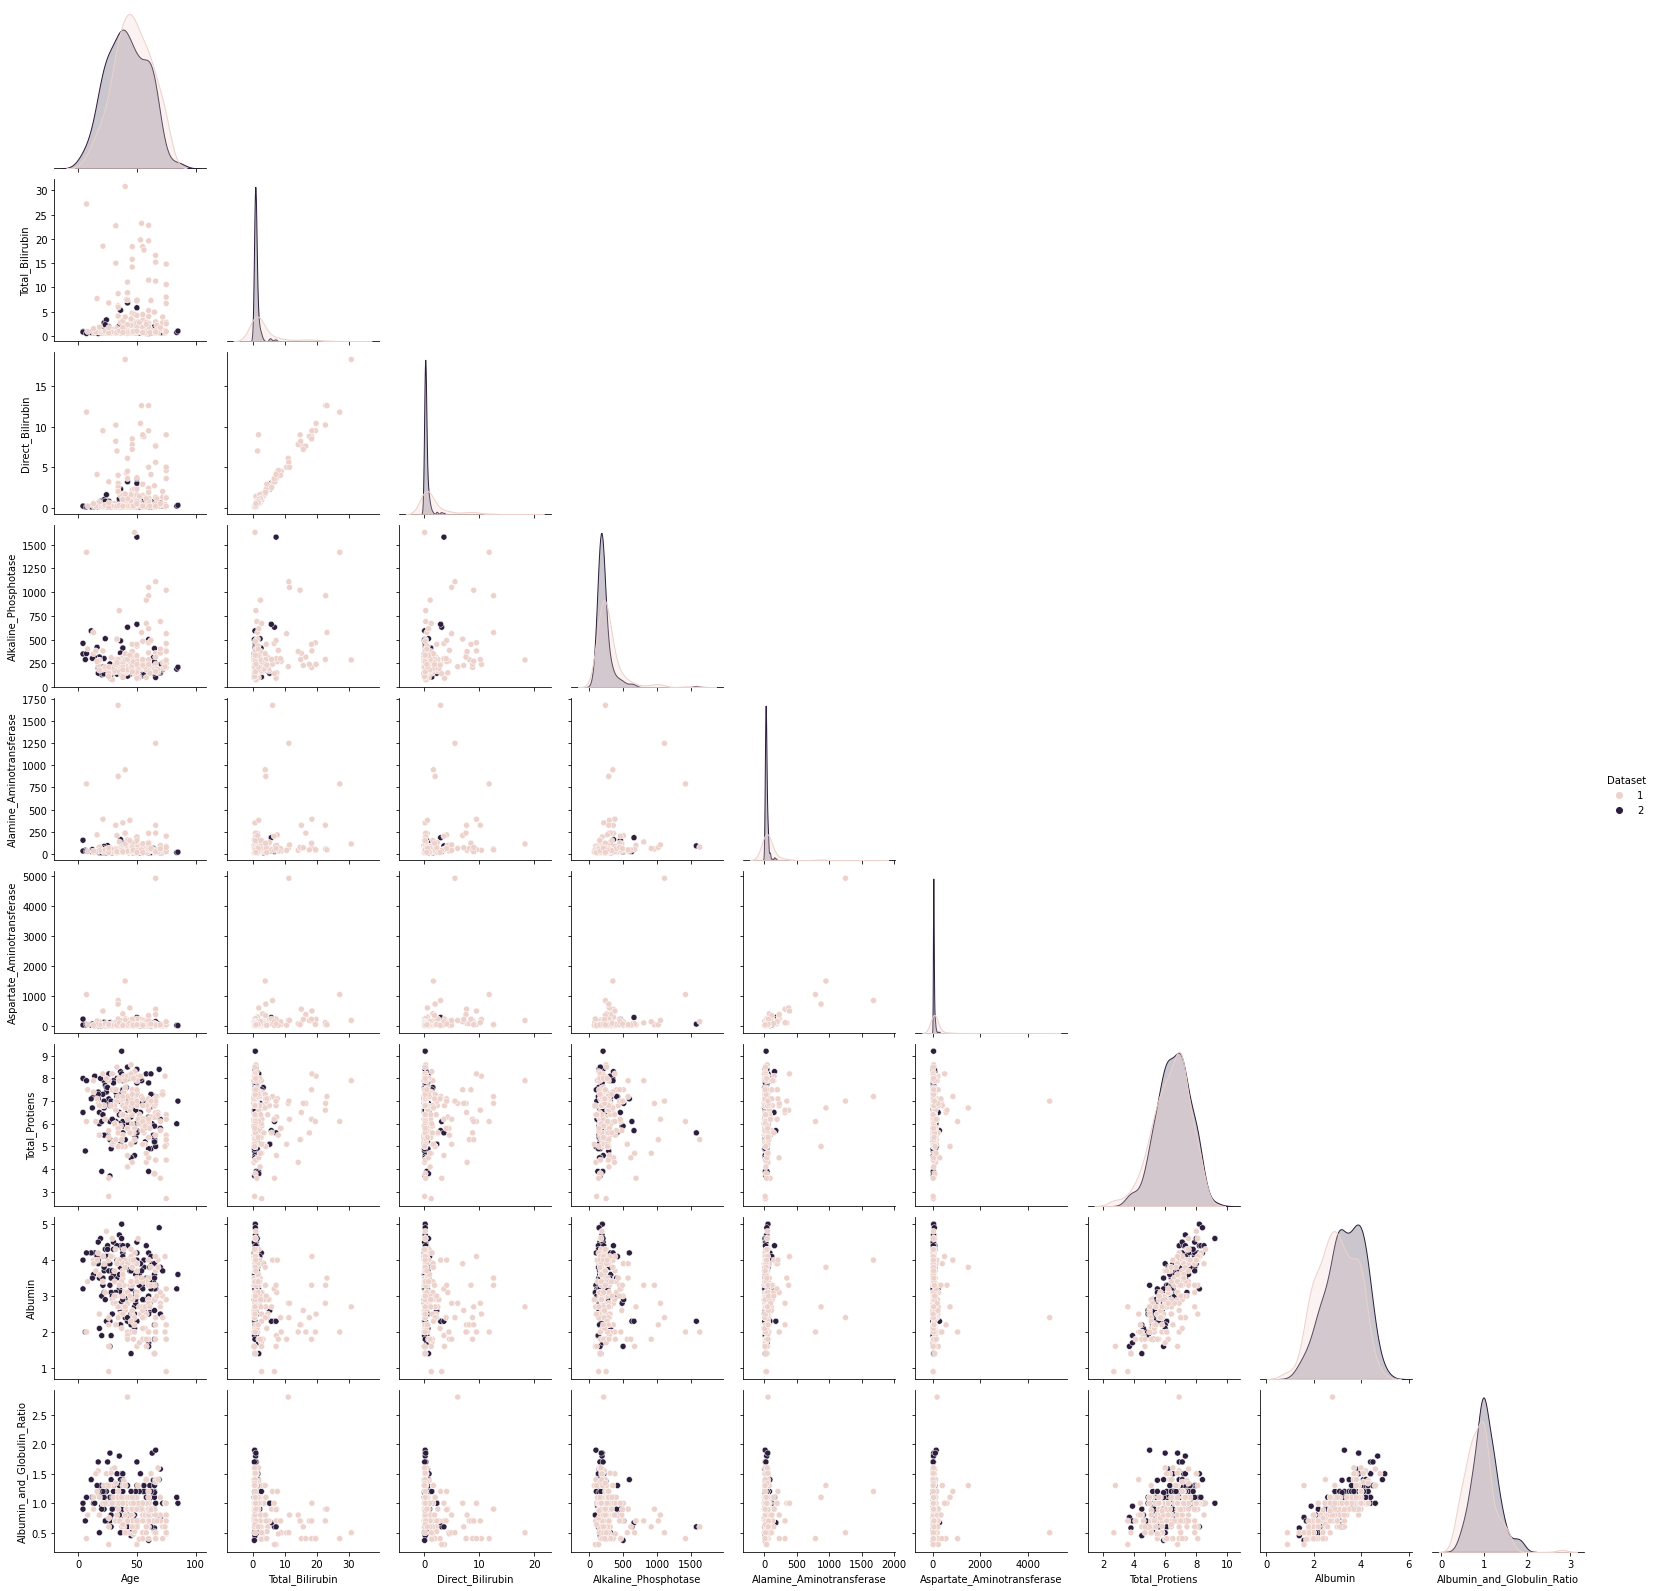

In [8]:
# Вывод составного графика
sns.pairplot(df, hue='Dataset', corner = True)

In [458]:
df.keys()

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

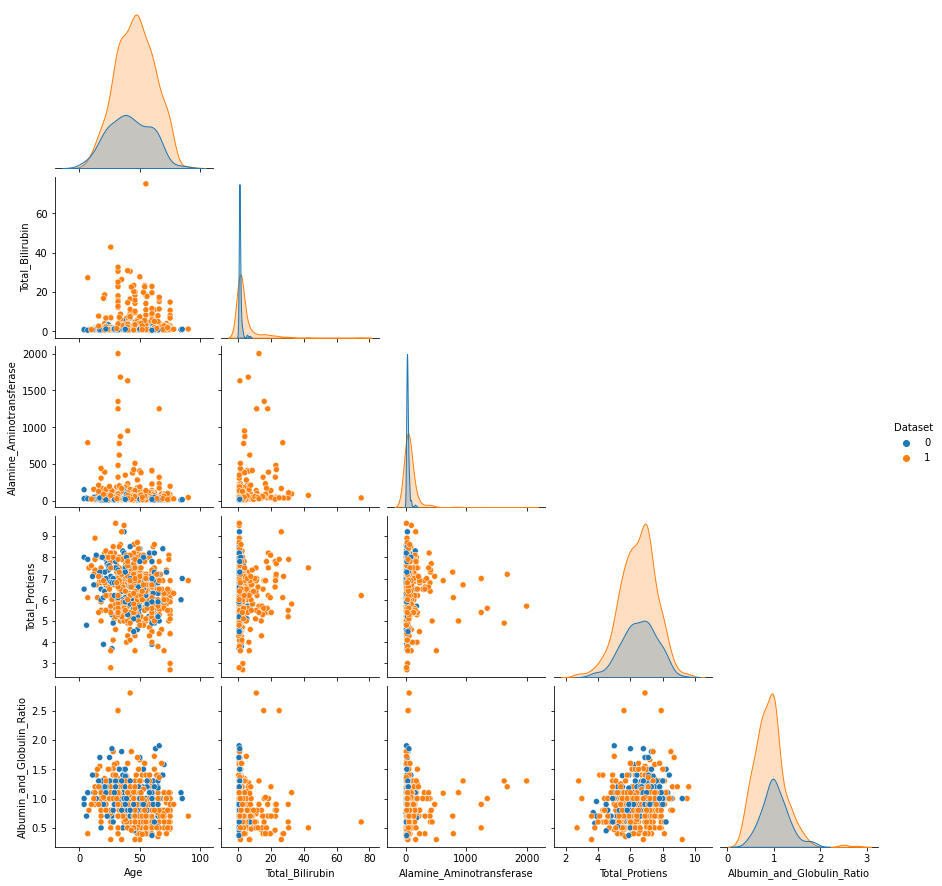

In [11]:
#здесь можно другие столбцы построить
collist = ['Age', 'Total_Bilirubin',
        'Alamine_Aminotransferase',
        'Total_Protiens',
       'Albumin_and_Globulin_Ratio', 'Dataset']
sns.pairplot(df[collist], hue='Dataset', corner = True)

In [12]:
# признаки, которые берем в модель 
collist = ['Age', 'Total_Bilirubin',
        'Alamine_Aminotransferase',
        'Total_Protiens',
       'Albumin_and_Globulin_Ratio']
priznaki = df[collist].values
# что предсказываем
response = df['Dataset']



In [13]:
# Разбиваем датасет на тренировочный и тестовый, используем стратификацию, 
# чтобы сохраниить одинаковые пропорции
x_train, x_test, y_train, y_test = train_test_split(priznaki, 
                                                    response,
                                                    random_state=0,
                                                    stratify= response)

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (434, 5), y_train shape: (434,),
X_test shape: (145, 5), y_test shape: (145,)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score,recall_score,balanced_accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

from sklearn import metrics

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# К ближайших соседей
# Выбор наилучшего K
accuracy_all = []
for K in range(50):
    K_value = K+1    
    knn = KNeighborsClassifier(n_neighbors = K_value)
    knn.fit(x_train, y_train) 
    knn_predictions = knn.predict(x_test)
    accuracy_all.append(accuracy_score(y_test,knn_predictions))
    
bestk = (np.argmax(accuracy_all)+1)
bestk

30

In [21]:
knn = KNeighborsClassifier(n_neighbors=bestk)

In [22]:
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)
knn_predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [23]:
accuracy_knn = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy_knn}')

Accuracy: 0.7172413793103448


In [29]:
# Перекрестная проверка
kfold = KFold(n_splits=10)
kfold = StratifiedKFold(n_splits=10)
scores_knn = cross_val_score(knn, priznaki, response, cv = kfold)
print("Значения правильности перекрестной проверки: {}".format(scores_knn))
print(f'Accuracy_mean: {scores_knn.mean()}')
print(f'Accuracy_max: {scores_knn.max()}')

Значения правильности перекрестной проверки: [0.72413793 0.74137931 0.70689655 0.72413793 0.68965517 0.67241379
 0.68965517 0.74137931 0.72413793 0.68421053]
Accuracy_mean: 0.7098003629764066
Accuracy_max: 0.7413793103448276


In [27]:
# создаем датафрейм под все метрики
metrics_all = pd.DataFrame()
metrics_all["names"] = ["Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score']

In [30]:
# Заполняем метрики
pre_knn = precision_score(y_test, knn_predictions) #- Precision
rec_knn = recall_score(y_test, knn_predictions) #Recall
bal_knn = balanced_accuracy_score(y_test, knn_predictions) # Balanced accuracy
f1_knn = f1_score(y_test, knn_predictions)
metrics_all["knn"] = [scores_knn.mean(),pre_knn, rec_knn,bal_knn,f1_knn]



[[14 27]
 [14 90]]


Text(0.5, 15.0, 'Predicted label')

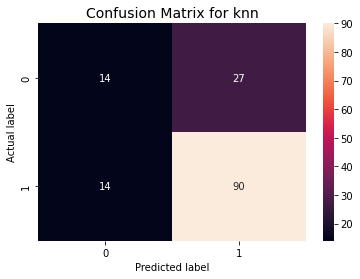

In [32]:
# Confusion Matrix - матрица неточностей
# True-positive ТP - у пациента болезнь, результат классификации 1.
# False-positive FP - у пациента нет болезни, результат классификации 1 - ошибка 1 рода,
# True-negative  TN - у пациента нет болезни, результат классификации 0,
# False-negative FN - у пациента болезнь, результат классификации 0, ошибка 2 рода.
knn_matrix = confusion_matrix(y_test, knn_predictions)
print(knn_matrix)
sns.heatmap(knn_matrix, annot=True)
plt.title("Confusion Matrix for knn", fontsize=14);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# Classification Report: 
# Precision = TP/(TP + FP), 
# Recall = TP/(TP+FN),
# F1 = 2(Precision x Recall)/(Precision + Recall)
print(metrics.classification_report(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       0.50      0.34      0.41        41
           1       0.77      0.87      0.81       104

    accuracy                           0.72       145
   macro avg       0.63      0.60      0.61       145
weighted avg       0.69      0.72      0.70       145



In [34]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,random_state=0).fit(x_train, y_train)


In [35]:
clf_predictions = clf.predict(x_test)
clf_predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [36]:
accuracy_clf = accuracy_score(y_test, clf_predictions)
print(f'Accuracy: {accuracy_clf}')

Accuracy: 0.7448275862068966


In [37]:
# Перекрестная проверка
kfold = StratifiedKFold(n_splits=10)
scores_clf = cross_val_score(clf, priznaki, response, cv = kfold) 

print("Значения правильности перекрестной проверки: {}".format(scores_clf))

print(f'Accuracy_mean: {scores_clf.mean()}')
print(f'Accuracy_max: {scores_clf.max()}')

Значения правильности перекрестной проверки: [0.72413793 0.72413793 0.72413793 0.70689655 0.74137931 0.72413793
 0.75862069 0.72413793 0.74137931 0.75438596]
Accuracy_mean: 0.7323351482153659
Accuracy_max: 0.7586206896551724


<AxesSubplot:>

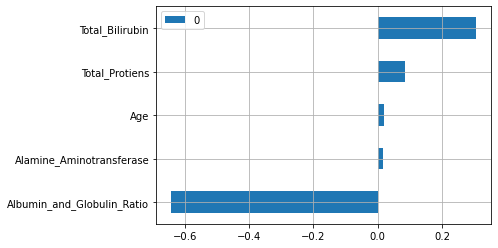

In [38]:
# Важность признаков в модели
#clf.fit(priznaki,response)
#importance = clf.coef_[0]
#(pd.DataFrame(importance,index = collist).sort_values(by=0).
 #plot(kind='barh',grid=True))

[[12 29]
 [ 8 96]]


Text(0.5, 15.0, 'Predicted label')

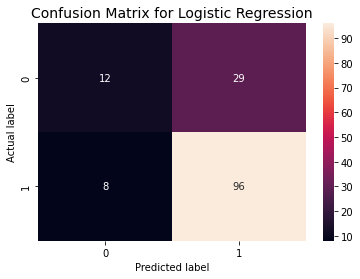

In [39]:
# Confusion Matrix - матрица неточностей
# True-positive ТP - у пациента болезнь, результат классификации 1.
# False-positive FP - у пациента нет болезни, результат классификации 1 - ошибка 1 рода,
# True-negative  TN - у пациента нет болезни, результат классификации 0,
# False-negative FN - у пациента болезнь, результат классификации 0, ошибка 2 рода.

clf_matrix = confusion_matrix(y_test, clf_predictions)
print(clf_matrix)
sns.heatmap(clf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression", fontsize=14);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [46]:
# Classification Report: 
# Precision = TP/(TP + FP), 
# Recall = TP/(TP+FN),
# F1 = 2(Precision x Recall)/(Precision + Recall)
print(metrics.classification_report(y_test, clf_predictions))


              precision    recall  f1-score   support

           0       0.60      0.29      0.39        41
           1       0.77      0.92      0.84       104

    accuracy                           0.74       145
   macro avg       0.68      0.61      0.62       145
weighted avg       0.72      0.74      0.71       145



In [40]:
# Заполняем метрики
pre_clf = precision_score(y_test, clf_predictions) #- Precision
rec_clf = recall_score(y_test, clf_predictions) #Recall
bal_clf = balanced_accuracy_score(y_test, clf_predictions) # Balanced accuracy
f1_clf = f1_score(y_test, clf_predictions)

metrics_all["clf"] = [scores_clf.mean(),pre_clf, rec_clf,bal_clf,f1_clf]

In [49]:
# Дерево решений
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(x_train, y_train)

In [51]:
dtc_predictions = dtc.predict(x_test)
dtc_predictions

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [52]:
accuracy_dtc = accuracy_score(y_test, dtc_predictions)
print(f'Accuracy: {accuracy_dtc}')

Accuracy: 0.7034482758620689


In [53]:
# Перекрестная проверка
kfold = StratifiedKFold(n_splits=10)
scores_dtc = cross_val_score(dtc, priznaki, response, cv = kfold) 

print("Значения правильности перекрестной проверки: {}".format(scores_dtc))

print(f'Accuracy_mean: {scores_dtc.mean()}')
print(f'Accuracy_max: {scores_dtc.max()}')

Значения правильности перекрестной проверки: [0.70689655 0.62068966 0.72413793 0.65517241 0.51724138 0.55172414
 0.63793103 0.51724138 0.79310345 0.71929825]
Accuracy_mean: 0.6443436176648518
Accuracy_max: 0.7931034482758621


<AxesSubplot:>

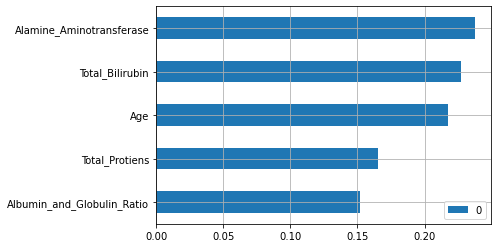

In [54]:
# Важность признаков в модели
dtc.fit(priznaki,response)
(pd.DataFrame(dtc.feature_importances_,index = collist).sort_values(by=0).
 plot(kind='barh',grid=True))

[[22 19]
 [24 80]]


Text(0.5, 15.0, 'Predicted label')

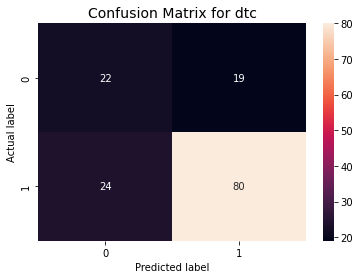

In [55]:
# Confusion Matrix - матрица неточностей
# True-positive ТP - у пациента болезнь, результат классификации 1.
# False-positive FP - у пациента нет болезни, результат классификации 1 - ошибка 1 рода,
# True-negative  TN - у пациента нет болезни, результат классификации 0,
# False-negative FN - у пациента болезнь, результат классификации 0, ошибка 2 рода.
dtc_matrix = confusion_matrix(y_test, dtc_predictions)
print(dtc_matrix)
sns.heatmap(dtc_matrix, annot=True)
plt.title("Confusion Matrix for dtc", fontsize=14);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
# Classification Report: 
# Precision = TP/(TP + FP), 
# Recall = TP/(TP+FN),
# F1 = 2(Precision x Recall)/(Precision + Recall)

print(metrics.classification_report(y_test, dtc_predictions))


              precision    recall  f1-score   support

           0       0.48      0.54      0.51        41
           1       0.81      0.77      0.79       104

    accuracy                           0.70       145
   macro avg       0.64      0.65      0.65       145
weighted avg       0.71      0.70      0.71       145



In [57]:
# Заполняем метрики
pre_dtc = precision_score(y_test, dtc_predictions) #- Precision
rec_dtc = recall_score(y_test, dtc_predictions) #Recall
bal_dtc = balanced_accuracy_score(y_test, dtc_predictions) # Balanced accuracy
f1_dtc = f1_score(y_test, dtc_predictions)

metrics_all["dtc"] = [scores_dtc.mean(),pre_dtc, rec_dtc,bal_dtc,f1_dtc]

In [58]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 80).fit(x_train,y_train)

In [60]:
rfc_predictions = rfc.predict(x_test)
rfc_predictions


array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [61]:
accuracy_rfc = accuracy_score(y_test, rfc_predictions)
print(f'Accuracy: {accuracy_rfc}')

Accuracy: 0.7172413793103448


In [67]:
# Выбор глубины
dept_all = []
kfold = StratifiedKFold(n_splits=5)
for i in range(1,10):
    rfc = RandomForestClassifier(n_estimators=80, max_depth=i)
    cross_val = cross_val_score(rfc, x_train, y_train, cv=kfold)
    dept_all.append(np.mean(cross_val))

bestdept = (np.argmax(dept_all)+1)
print(bestdept)

5


In [68]:
rfc = RandomForestClassifier(n_estimators=80, max_depth=bestdept).fit(x_train,y_train)
rfc_predictions = rfc.predict(x_test)

accuracy_rfc = accuracy_score(y_test, rfc_predictions)
print(f'Accuracy: {accuracy_rfc}')

Accuracy: 0.6758620689655173


In [71]:
#Перекрестная проверка
kfold = StratifiedKFold(n_splits=10)
scores_rfc = cross_val_score(rfc, priznaki, response, cv = kfold) 

print("Значения правильности перекрестной проверки: {}".format(scores_rfc))

print(f'Accuracy_mean: {scores_rfc.mean()}')
print(f'Accuracy_max: {scores_rfc.max()}')

Значения правильности перекрестной проверки: [0.72413793 0.68965517 0.70689655 0.75862069 0.68965517 0.68965517
 0.70689655 0.70689655 0.74137931 0.71929825]
Accuracy_mean: 0.713309134906231
Accuracy_max: 0.7586206896551724


<AxesSubplot:>

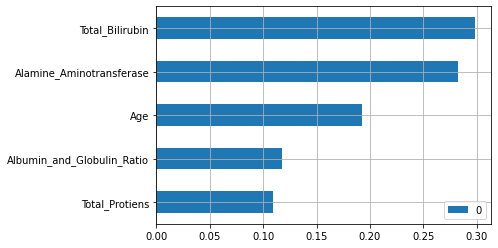

In [72]:
# Важность признаков в модели
rfc.fit(priznaki,response)
(pd.DataFrame(rfc.feature_importances_,index = collist).sort_values(by=0).
 plot(kind='barh',grid=True))

[[ 4 37]
 [10 94]]


Text(0.5, 15.0, 'Predicted label')

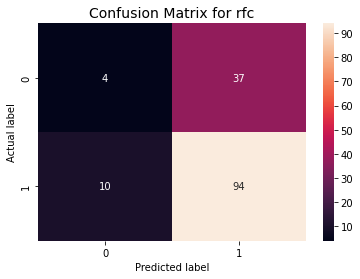

In [73]:
# Confusion Matrix - матрица неточностей
# True-positive ТP - у пациента болезнь, результат классификации 1.
# False-positive FP - у пациента нет болезни, результат классификации 1 - ошибка 1 рода,
# True-negative  TN - у пациента нет болезни, результат классификации 0,
# False-negative FN - у пациента болезнь, результат классификации 0, ошибка 2 рода.
rfc_matrix = confusion_matrix(y_test, rfc_predictions)
sns.heatmap(rfc_matrix, annot=True)
plt.title("Confusion Matrix for rfc", fontsize=14);
print(rfc_matrix)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [74]:
# Classification Report: 
# Precision = TP/(TP + FP), 
# Recall = TP/(TP+FN),
# F1 = 2(Precision x Recall)/(Precision + Recall)
print(metrics.classification_report(y_test, rfc_predictions))


              precision    recall  f1-score   support

           0       0.29      0.10      0.15        41
           1       0.72      0.90      0.80       104

    accuracy                           0.68       145
   macro avg       0.50      0.50      0.47       145
weighted avg       0.60      0.68      0.61       145



In [75]:
# Заполняем метрики
pre_rfc = precision_score(y_test, rfc_predictions) #- Precision
rec_rfc = recall_score(y_test, rfc_predictions) #Recall
bal_rfc = balanced_accuracy_score(y_test, rfc_predictions) # Balanced accuracy
f1_rfc = f1_score(y_test, rfc_predictions)

metrics_all["rfc"] = [scores_rfc.mean(),pre_rfc, rec_rfc,bal_rfc,f1_rfc]

In [76]:
#Сравнение метрик для всех алгоритмов
metrics_all

,names,knn,clf,mnb,dtc,rfc
0,Accuracy,0.709800,0.732335,0.525378,0.644344,0.713309
1,Precision,0.769231,0.768000,0.792453,0.808081,0.717557
2,Recall,0.865385,0.923077,0.403846,0.769231,0.903846
3,Balanced accuracy,0.603424,0.607880,0.567777,0.652908,0.500704
4,F1 score,0.814480,0.838428,0.535032,0.788177,0.800000


In [41]:
# Наивный баесовский метод
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(x_train, y_train)

In [42]:
mnb_predictions = mnb.predict(x_test)
mnb_predictions

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [43]:
accuracy = accuracy_score(y_test, mnb_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.496551724137931


In [44]:
# Перекрестная проверка
kfold = StratifiedKFold(n_splits=10)
scores_mnb = cross_val_score(mnb, priznaki, response, cv = kfold) 
print("Значения правильности перекрестной проверки: {}".format(scores_mnb))

print(f'Accuracy_mean: {scores_mnb.mean()}')
print(f'Accuracy_max: {scores_mnb.max()}')


Значения правильности перекрестной проверки: [0.5        0.60344828 0.56896552 0.48275862 0.43103448 0.46551724
 0.5        0.43103448 0.55172414 0.71929825]
Accuracy_mean: 0.5253781004234724
Accuracy_max: 0.7192982456140351


[[30 11]
 [62 42]]


Text(0.5, 15.0, 'Predicted label')

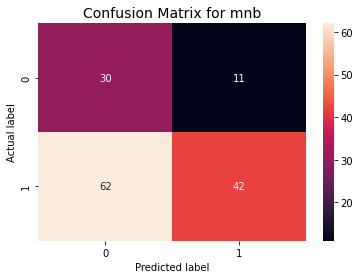

In [45]:
# Confusion Matrix - матрица неточностей
# True-positive ТP - у пациента болезнь, результат классификации 1.
# False-positive FP - у пациента нет болезни, результат классификации 1 - ошибка 1 рода,
# True-negative  TN - у пациента нет болезни, результат классификации 0,
# False-negative FN - у пациента болезнь, результат классификации 0, ошибка 2 рода.

mnb_matrix = confusion_matrix(y_test, mnb_predictions)
print(mnb_matrix)
sns.heatmap(mnb_matrix, annot=True)
plt.title("Confusion Matrix for mnb", fontsize=14);
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
# Classification Report: 
# Precision = TP/(TP + FP), 
# Recall = TP/(TP+FN),
# F1 = 2(Precision x Recall)/(Precision + Recall)
print(metrics.classification_report(y_test, mnb_predictions))


              precision    recall  f1-score   support

           0       0.33      0.73      0.45        41
           1       0.79      0.40      0.54       104

    accuracy                           0.50       145
   macro avg       0.56      0.57      0.49       145
weighted avg       0.66      0.50      0.51       145



In [48]:
# Заполняем метрики
pre_mnb = precision_score(y_test, mnb_predictions) #- Precision
rec_mnb = recall_score(y_test, mnb_predictions) #Recall
bal_mnb = balanced_accuracy_score(y_test, mnb_predictions) # Balanced accuracy
f1_mnb = f1_score(y_test, mnb_predictions)

metrics_all["mnb"] = [scores_mnb.mean(),pre_mnb, rec_mnb,bal_mnb,f1_mnb]

In [77]:
#Сравнение метрик для всех алгоритмов
metrics_all

,names,knn,clf,mnb,dtc,rfc
0,Accuracy,0.709800,0.732335,0.525378,0.644344,0.713309
1,Precision,0.769231,0.768000,0.792453,0.808081,0.717557
2,Recall,0.865385,0.923077,0.403846,0.769231,0.903846
3,Balanced accuracy,0.603424,0.607880,0.567777,0.652908,0.500704
4,F1 score,0.814480,0.838428,0.535032,0.788177,0.800000


0.7157598499061912
0.7293621013133209
0.6071763602251408
0.611515009380863
0.697467166979362


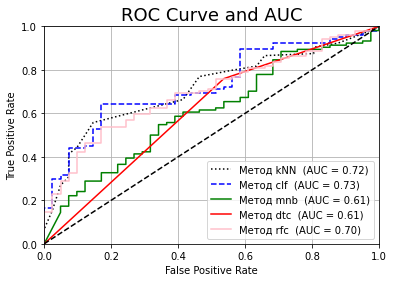

In [78]:
# Построение ROC-кривых - зависимость количества верно классифицированных положительных примеров 
# от количества неверно классифицированных отрицательных примеров.
# True-positive - у пациента болезнь, результат классификации 1.
# False-positive - у пациента нет болезни, результат классификации 1,
# True-negative   у пациента нет болезни, результат классификации 0,
# False-negative - у пациента болезнь, результат классификации 0.

import sklearn.metrics as metrics
from scipy import interp
plt.figure()
plt.title("ROC Curve and AUC", fontsize=18)

mod_knn = knn.fit(x_train, y_train).predict_proba(x_test)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, mod_knn[:,1])
roc_auc  = auc(fpr_knn, tpr_knn)
print(roc_auc)
plt.plot(fpr_knn, tpr_knn, label='%s  (AUC = %0.2f)' % ('Метод kNN',roc_auc), color = 'black',linestyle = ':')

mod_clf = clf.fit(x_train, y_train).predict_proba(x_test)
fpr_clf, tpr_clf, thresholds_clf = metrics.roc_curve(y_test, mod_clf[:,1])
roc_auc  = auc(fpr_clf, tpr_clf)
print(roc_auc)
plt.plot(fpr_clf, tpr_clf, label='%s  (AUC = %0.2f)' % ('Метод clf',roc_auc), color = 'blue',linestyle = '--')

mod_mnb = mnb.fit(x_train, y_train).predict_proba(x_test)
fpr_mnb, tpr_mnb, thresholds_mnb = metrics.roc_curve(y_test, mod_mnb[:,1])
roc_auc  = auc(fpr_mnb, tpr_mnb)
print(roc_auc)
plt.plot(fpr_mnb, tpr_mnb, label='%s  (AUC = %0.2f)' % ('Метод mnb',roc_auc), color = 'green')

mod_dtc = dtc.fit(x_train, y_train).predict_proba(x_test)
fpr_dtc, tpr_dtc, thresholds_dtc = metrics.roc_curve(y_test, mod_dtc[:,1])
roc_auc  = auc(fpr_dtc, tpr_dtc)
print(roc_auc)
plt.plot(fpr_dtc, tpr_dtc, label='%s  (AUC = %0.2f)' % ('Метод dtc',roc_auc), color = 'red')
         
mod_rfc = rfc.fit(x_train, y_train).predict_proba(x_test)
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, mod_rfc[:,1])
roc_auc  = auc(fpr_rfc, tpr_rfc)
print(roc_auc)
plt.plot(fpr_rfc, tpr_rfc, label='%s  (AUC = %0.2f)' % ('Метод rfc',roc_auc), color = 'pink')
         
plt.legend(loc=0)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()


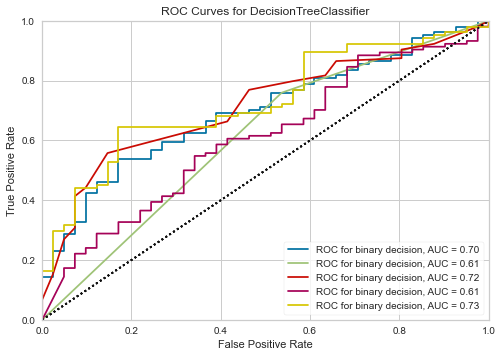

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [80]:
#тут хз как менять легенду
from yellowbrick.classifier import ROCAUC

plt.figure()
plt.title("ROC Curve and AUC", fontsize=18)

roc_auc1 = ROCAUC(rfc, per_class=False, macro = False, micro = False) 
# micro микро-среднюю кривую ROC, вычисленную из суммы всех истинных положительных и ложных срабатываний по всем классам. 
roc_auc1.fit(x_train, y_train)
roc_auc1.score(x_test, y_test)


roc_auc2=ROCAUC(dtc, per_class=False,macro = False, micro = False)
roc_auc2.fit(x_train, y_train)
roc_auc2.score(x_test, y_test)

roc_auc3=ROCAUC(knn, per_class=False,macro = False, micro = False)
roc_auc3.fit(x_train, y_train)
roc_auc3.score(x_test, y_test)


roc_auc4=ROCAUC(mnb, per_class=False,macro = False, micro = False)
roc_auc4.fit(x_train, y_train)
roc_auc4.score(x_test, y_test)

roc_auc5=ROCAUC(clf, per_class=False,macro = False, micro = False)
roc_auc5.fit(x_train, y_train)
roc_auc5.score(x_test, y_test)

roc_auc2.show()
roc_auc1.show()
roc_auc3.show()
roc_auc4.show()
roc_auc5.show()